<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/labs/Bayesian_posteriors_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions


Create a function that takes a prior, a likelihood as arguments and plots the prior, likelihood, and posterior (normalize each so that the peak is at the same height for optimal visibility)

Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal



In [1]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
x = np.linspace(-5, 15, 1000)

normal_0 = stats.norm.pdf(x, loc=0, scale=1)
normal_10 = stats.norm.pdf(x, loc=10, scale=1)
t_0 = stats.t.pdf(x, df=2, loc=0, scale=1)

t_10 = stats.t.pdf(x, df=2, loc=10, scale=1)

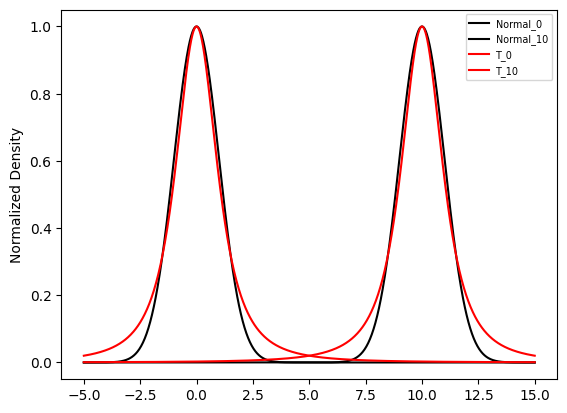

In [39]:
fig, ax = plt.subplots()

ax.plot(x, normal_0 / normal_0.max(), 'k', label='Normal_0')
ax.plot(x, normal_10 / normal_10.max(), 'k', label='Normal_10')
ax.plot(x, t_0 / t_0.max(), 'r', label='T_0')
ax.plot(x, t_10 / t_10.max(), 'r', label='T_10')
ax.set(ylabel='Normalized Density')
ax.legend(fontsize='x-small')

plt.show()

In [31]:
def posterior(prior, likelihood):

  x = np.linspace(-5, 15, 1000)
  posterior = prior * likelihood

  fig, ax = plt.subplots()

  ax.plot(x, prior / prior.max(), 'k', label='Prior')
  ax.plot(x, likelihood / likelihood.max(), 'k', label='Likelihood')
  ax.plot(x, posterior / posterior.max(), 'r--', label='Posterior')

  ax.set(ylabel='Normalized Density')
  ax.legend(fontsize='x-small')

  return ax

[Text(0.5, 1.0, 'Prior = Normal_0, Likelihood = Normal_10')]

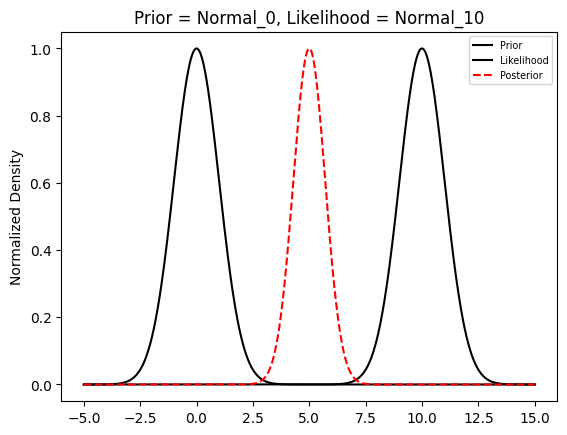

In [35]:
ax = posterior(normal_0, normal_10)
ax.set(title='Prior = Normal_0, Likelihood = Normal_10')

[Text(0.5, 1.0, 'Prior = T_0, Likelihood = T_10')]

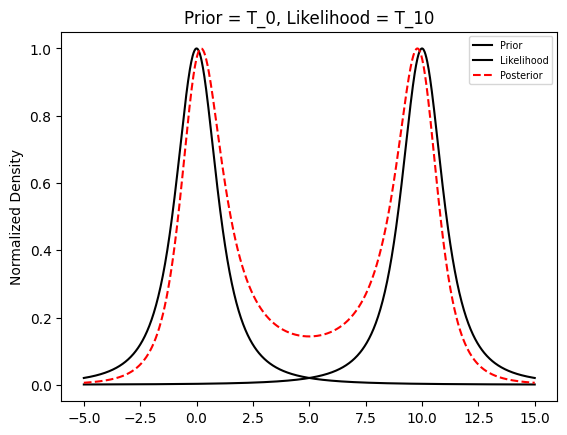

In [36]:
ax = posterior(t_0, t_10)
ax.set(title='Prior = T_0, Likelihood = T_10')

[Text(0.5, 1.0, 'Prior = Normal_0, Likelihood = T_10')]

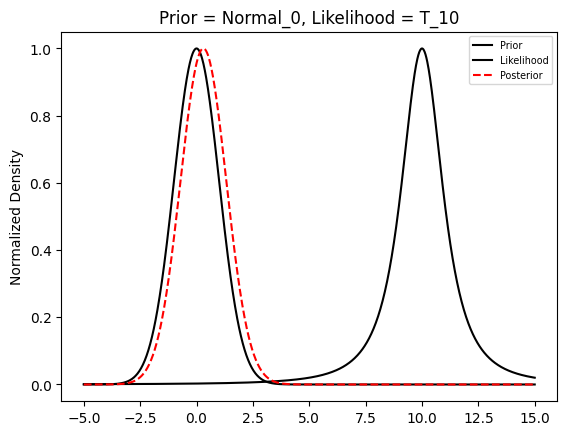

In [37]:
ax = posterior(normal_0, t_10)
ax.set(title='Prior = Normal_0, Likelihood = T_10')

[Text(0.5, 1.0, 'Prior = T_0, Likelihood = Normal_10')]

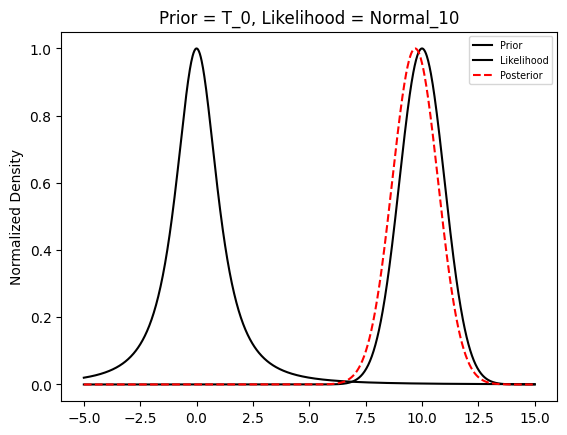

In [38]:
ax = posterior(t_0, normal_10)
ax.set(title='Prior = T_0, Likelihood = Normal_10')